### Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [37]:
#Loading the dataset into data variable
data = pd.read_csv(r"C:\Users\adnan\Downloads\spam.csv",encoding = 'latin-1',engine = "python",usecols = ['v1','v2'])

In [38]:
#Printing the first 5 rows from the dataset
data.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
#Checking the rows and columns of the data
data.shape

(5572, 2)

In [40]:
#Getting the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [41]:
#statistical representation of the dataset
data.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [42]:
#Checking the datatypes of each attributes
data.dtypes

v1    object
v2    object
dtype: object

### Data Preprocessing

In [44]:
#import Library
import re
import string
#Function To Process The Text
def cleaner(text):
   #converts texts into lowercase
    text = text.lower()
    #remove all substrings enclosed in square brackets from the text
    text = re.sub('\[,*?\]', ' ',text)
    #Removes non word characters
    text = re.sub("\\W"," ",text)
    #Removes URLs
    text = re.sub('https?://\S+\www\.\s+',' ',text)
    #Removes HTML tags
    text = re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    #Removes new line characters
    text = re.sub('\n',' ',text)
     #remove all substrings containing at least one digit from the text
    text = re.sub('\w*\d\w*', ' ',text)
    return text

In [45]:
#Apply the wordopt function to each text element in the data
data['v2'] = data['v2'].apply(cleaner)

In [46]:
data.head()

,v1,v2
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...


### Exploratory Data Analysis

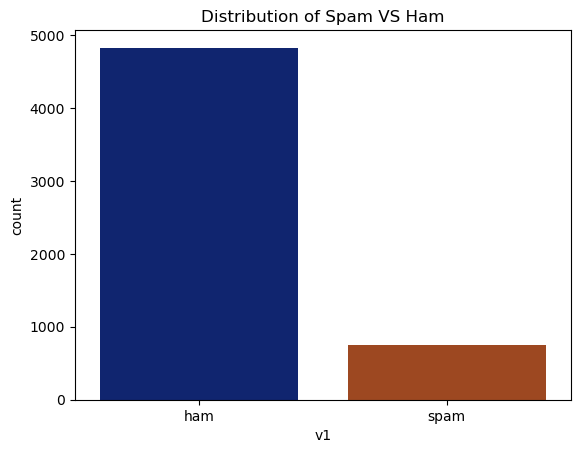

In [48]:
#Create a count plot to visualize the distribution of tabels in the data
sns.countplot(x = 'v1',data=data,palette='dark')

#Set the title of the plot to describe its content
plt.title('Distribution of Spam VS Ham')

#Display the plot
plt.show()

In [49]:
#import the Library
from wordcloud import WordCloud

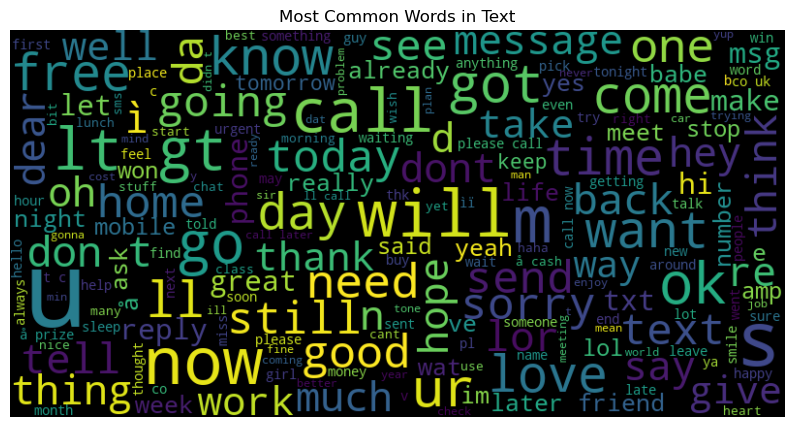

In [50]:
wordcloud = WordCloud(width=800,height=400,random_state=21,max_font_size=110).generate(' '.join(data['v2']))
#Displaying the word cloud with saome features
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title('Most Common Words in Text')
plt.show()

### Feature Engineering

In [52]:
#importing the libraries
from sklearn.feature_extraction.text import TfidfVectorizer

#Create a TfidfVectorizer instance to cinvert text data into a matrix of TF-IDF features
vectorization = TfidfVectorizer(max_features = 5000)

#Fit the vectorizer to the data and transform the text data
X = vectorization.fit_transform(data['v2'])

#Get the label values from the data as a numpy array
y = data['v1'].values

## Divide X and Y

In [54]:
X = vectorization.fit_transform(data['v2']).toarray()
y = data['v1'].values

### Splitting into Train and Test Parts

In [56]:
#importing the library
from sklearn.model_selection import train_test_split

#splits the dataset into training and testing sets with a 80:20 ratio
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [57]:
#checking count of the dataset
class_frequencies = data['v1'].value_counts()

#Displaying the count
print(class_frequencies)

v1
ham     4825
spam     747
Name: count, dtype: int64


In [58]:
#importing the library
from imblearn.over_sampling import SMOTE

#Initialize SMOTE with a fixed random state
smote = SMOTE(random_state = 42)

#Generate resampled datasets to balance class distribution.
X_resampled,y_resampled = smote.fit_resample(X,y)

In [59]:
print("resampled class Distribution:")
print(pd.Series(y_resampled).value_counts())

resampled class Distribution:
ham     4825
spam    4825
Name: count, dtype: int64


## Training Model

### Logistic Regression

In [62]:
#importing the library
from sklearn.linear_model import LogisticRegression

In [63]:
#Loading the model in variable
LR = LogisticRegression(penalty = 'l2',C = 0.01)

In [64]:
#Training the model using x_train and y_train
LR.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [65]:
pred_LR = LR.predict(X_test)

In [66]:
#importing the library
from sklearn.metrics import accuracy_score

In [67]:
#calculates Accuracy of Training data
train_accuracy = accuracy_score(y_train,LR.predict(X_train))
print(train_accuracy)

0.8660533991474085


In [68]:
#predicts Accuracy of Testing Data
y_pred = LR.predict(X_test)

#calculates Accuracy Of Testing Data
test_accuracy = accuracy_score(y_test,y_pred)

#Displays the Accuracy of Testing Data
print(test_accuracy)

0.8654708520179372


In [69]:
#importing the library
from sklearn.metrics import classification_report

#Displays classification report
print(classification_report(y_test,pred_LR))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       965
        spam       0.00      0.00      0.00       150

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



### Support Vector Machine

In [71]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')

In [72]:
SVM.fit(X_train,y_train)

SVC(kernel='linear')

In [73]:
y_pred = SVM.predict(X_test)

In [74]:
#importing the library
from sklearn.metrics import accuracy_score

#calculates Accuracy of Training data
train_accuracy = accuracy_score(y_train,SVM.predict(X_train))
print(train_accuracy)

0.9950639443571909


In [75]:
#predicts Accuracy of Testing Data
y_pred = SVM.predict(X_test)

#calculates Accuracy Of Testing Data
test_accuracy = accuracy_score(y_test,y_pred)

#Displays the Accuracy of Testing Data
print(test_accuracy)

0.9820627802690582


In [76]:
#importing the library
from sklearn.metrics import classification_report

In [77]:
#Displays classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Naive Bayes

In [79]:
#importing the library
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
cv = CountVectorizer()

In [81]:
#Convert to string and lowercase
data['processed_text'] = data['v2'].astype(str).apply(lambda x: x.lower())

In [82]:
data['v1'] = data['v1'].map({'spam': 1, 'ham': 0})

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data['v2'], data['v1'], test_size=0.2, random_state=42)

In [84]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 2))  # Bigrams (1,2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [85]:
nb_model = MultinomialNB(alpha=0.5)  # With alpha adjustment
nb_model.fit(X_train_tfidf, y_train)

#Make predictions on both train and test sets
y_train_pred = nb_model.predict(X_train_tfidf)  # Predictions on the training set
y_test_pred = nb_model.predict(X_test_tfidf)    # Predictions on the test set

In [86]:
y_test_pred = nb_model.predict(X_test_tfidf)    # Predictions on the test set

In [87]:
#importing the library
from sklearn.metrics import accuracy_score

# Step 8: Calculate accuracy for both training and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [88]:
#Print the accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9912
Test Accuracy: 0.9749


In [89]:
#Classification report for the test set
print(f"Classification Report for Test Set:\n{classification_report(y_test, y_test_pred)}")

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.90       150

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115

